In [17]:
import os
import torch
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
import torch.nn as nn
import torch.nn.functional as f
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [18]:
data_dir = '../Data'
df = ImageFolder(data_dir)

In [19]:
df[1]

(<PIL.Image.Image image mode=RGB size=160x160>, 0)

0


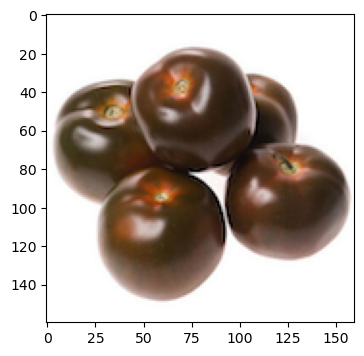

In [20]:
img_1, lable = df[1]

print(lable)

plt.figure(figsize = (4, 4))
plt.imshow(img_1)
plt.show()

In [21]:
df = ImageFolder(data_dir, tt.Compose([
    tt.Resize(150),
    tt.RandomCrop(150),
    tt.ToTensor()
]))

In [22]:
len(df)

776

Dataframe contain 776 images.

In [23]:
list(df.classes)

['1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

It belog to the 15 classes.

In [26]:
for i in os.listdir(data_dir):
    print(f"{i} --> {len(os.listdir(data_dir + '/' + i))}")

1 --> 49
10 --> 43
11 --> 47
12 --> 55
13 --> 60
14 --> 35
15 --> 55
2 --> 68
3 --> 66
4 --> 54
5 --> 38
6 --> 62
7 --> 44
8 --> 57
9 --> 43


In [27]:
img_1, label_1 = df[1]

0


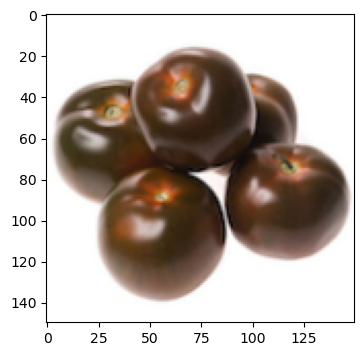

In [28]:
print(label_1)
plt.figure(figsize = (4, 4))
plt.imshow(img_1.permute(1, 2, 0))
plt.show()

In [11]:
test_pct = 0.1
test_size = int(test_pct * len(df))

train_size = int(len(df) - test_size)

print(f"train size = {train_size}")
print(f"test size = {test_size}")

train size = 699
test size = 77


In [29]:
train_df, test_df = random_split(df, [train_size, test_size])

In [30]:
batch_size = 100

train_dl = DataLoader(dataset = train_df,
                     batch_size = batch_size,
                     shuffle = True,
                     pin_memory = True)

test_dl = DataLoader(dataset = test_df,
                     batch_size = batch_size,
                     shuffle = True,
                     pin_memory = True)

In [31]:
torch.cuda.is_available()

False

In [36]:
class ConModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=(3,3), stride=1, padding=1)
        self.act1 = nn.ReLU()
        self.drop1 = nn.Dropout(0.3)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=(3,3), stride=1, padding=1)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2))
        self.flat = nn.Flatten()
        self.fc3 = nn.Linear(8192, 512)
        self.act3 = nn.ReLU()
        self.drop3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(512, 10)
 
    def forward(self, x):
        x = self.act1(self.conv1(x))
        x = self.drop1(x)
        x = self.act2(self.conv2(x))
        x = self.pool2(x)
        x = self.flat(x)
        x = self.act3(self.fc3(x))
        x = self.drop3(x)
        x = self.fc4(x)
        return x

In [39]:
model = ConModel()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
n_epochs = 5
for epoch in range(n_epochs):
    for inputs, labels in train_dl:
        y_pred = model(inputs)
        loss = loss_fn(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    acc = 0
    count = 0
    for inputs, labels in testloader:
        y_pred = model(inputs)
        acc += (torch.argmax(y_pred, 1) == labels).float().sum()
        count += len(labels)
    acc /= count
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))